In [141]:
!pip install pyspark
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CarSales').getOrCreate()
sales_df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)
sales_df.printSchema()

root
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Fuel Type: string (nullable = true)
 |-- Engine HP: integer (nullable = true)
 |-- Engine Cylinders: integer (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Driven_Wheels: string (nullable = true)
 |-- Number of Doors: integer (nullable = true)
 |-- Market Category: string (nullable = true)
 |-- Vehicle Size: string (nullable = true)
 |-- Vehicle Style: string (nullable = true)
 |-- highway MPG: integer (nullable = true)
 |-- city mpg: integer (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- MSRP: integer (nullable = true)



In [142]:
sales_df.show(10)

+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL|rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|rear wheel drive|              2|  Luxury,Performance|     Compact|  Convertible

In [143]:
sales_df.na.drop(how="any").show(truncate=False)

+----+----------+----+---------------------------+---------+----------------+-----------------+-----------------+---------------+-------------------------------------+------------+-------------+-----------+--------+----------+-----+
|Make|Model     |Year|Engine Fuel Type           |Engine HP|Engine Cylinders|Transmission Type|Driven_Wheels    |Number of Doors|Market Category                      |Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity|MSRP |
+----+----------+----+---------------------------+---------+----------------+-----------------+-----------------+---------------+-------------------------------------+------------+-------------+-----------+--------+----------+-----+
|BMW |1 Series M|2011|premium unleaded (required)|335      |6               |MANUAL           |rear wheel drive |2              |Factory Tuner,Luxury,High-Performance|Compact     |Coupe        |26         |19      |3916      |46135|
|BMW |1 Series  |2011|premium unleaded (required)|300      |6       

In [144]:
sales_df.summary().show()

+-------+-----+------------------+-----------------+----------------+------------------+------------------+-----------------+----------------+------------------+------------------+------------+-------------+------------------+------------------+------------------+-----------------+
|summary| Make|             Model|             Year|Engine Fuel Type|         Engine HP|  Engine Cylinders|Transmission Type|   Driven_Wheels|   Number of Doors|   Market Category|Vehicle Size|Vehicle Style|       highway MPG|          city mpg|        Popularity|             MSRP|
+-------+-----+------------------+-----------------+----------------+------------------+------------------+-----------------+----------------+------------------+------------------+------------+-------------+------------------+------------------+------------------+-----------------+
|  count|11826|             11826|            11826|           11823|             11826|             11803|            11826|           11826|         

In [172]:
from pyspark.sql.functions import isnan, when, count, col

sales_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()
sales_df.na.drop(how="any").show(truncate=False)

+---------+----------------+---------------+-----------+--------+----------+----+
|Engine HP|Engine Cylinders|Number of Doors|highway MPG|city mpg|Popularity|MSRP|
+---------+----------------+---------------+-----------+--------+----------+----+
|       88|             111|             89|         88|      88|        88|  88|
+---------+----------------+---------------+-----------+--------+----------+----+

+---------+----------------+---------------+-----------+--------+----------+-----+
|Engine HP|Engine Cylinders|Number of Doors|highway MPG|city mpg|Popularity|MSRP |
+---------+----------------+---------------+-----------+--------+----------+-----+
|335      |6               |2              |26         |19      |3916      |46135|
|300      |6               |2              |28         |19      |3916      |40650|
|300      |6               |2              |28         |20      |3916      |36350|
|230      |6               |2              |28         |18      |3916      |29450|
|230    

In [146]:
sales_df = sales_df.drop("Make","Model","Year","Engine Fuel Type","Transmission Type","Driven_Wheels","Vehicle Size","Vehicle Style","Market Category")
sales_df.show()

+---------+----------------+---------------+-----------+--------+----------+-----+
|Engine HP|Engine Cylinders|Number of Doors|highway MPG|city mpg|Popularity| MSRP|
+---------+----------------+---------------+-----------+--------+----------+-----+
|      335|               6|              2|         26|      19|      3916|46135|
|      300|               6|              2|         28|      19|      3916|40650|
|      300|               6|              2|         28|      20|      3916|36350|
|      230|               6|              2|         28|      18|      3916|29450|
|      230|               6|              2|         28|      18|      3916|34500|
|      230|               6|              2|         28|      18|      3916|31200|
|      300|               6|              2|         26|      17|      3916|44100|
|      300|               6|              2|         28|      20|      3916|39300|
|      230|               6|              2|         28|      18|      3916|36900|
|   

In [173]:
data_clean = sales_df.select("*")

EDA

In [149]:
data_clean.groupBy("Engine Cylinders").count().show()

+----------------+-----+
|Engine Cylinders|count|
+----------------+-----+
|              12|  230|
|            null|  111|
|               6| 4473|
|              16|    3|
|               3|   30|
|               5|  225|
|               4| 4743|
|               8| 2031|
|              10|   68|
+----------------+-----+



In [150]:
data_clean.groupBy("Engine HP").count().show()

+---------+-----+
|Engine HP|count|
+---------+-----+
|      148|   94|
|      540|   15|
|      580|    5|
|      137|   16|
|      451|    1|
|      251|    6|
|      255|   56|
|      296|   17|
|      133|    4|
|      322|   11|
|       78|    8|
|      321|   18|
|      362|   10|
|      597|    2|
|      375|   19|
|      155|  156|
|      108|   31|
|      193|   12|
|      530|    3|
|      211|    9|
+---------+-----+
only showing top 20 rows



In [174]:
data_clean.groupBy("Number of Doors").count().show()

+---------------+-----+
|Number of Doors|count|
+---------------+-----+
|           null|   89|
|              3|  395|
|              4| 8273|
|              2| 3157|
+---------------+-----+



ML

In [152]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
indexer = StringIndexer(inputCol="Engine HP", outputCol= "HP_cat",handleInvalid="skip")
indexed = indexer.fit(data_clean).transform(data_clean)
indexer = StringIndexer(inputCol="Engine Cylinders", outputCol= "Cyl_cat",handleInvalid="skip")
indexed = indexer.fit(indexed).transform(indexed)
indexer = StringIndexer(inputCol="Number of Doors", outputCol= "Door_cat",handleInvalid="skip")
indexed = indexer.fit(indexed).transform(indexed)
indexer = StringIndexer(inputCol="highway MPG", outputCol= "hmpg_cat",handleInvalid="skip")
indexed = indexer.fit(indexed).transform(indexed)
indexer = StringIndexer(inputCol="city mpg", outputCol= "cmpg_cat",handleInvalid="skip")
indexed = indexer.fit(indexed).transform(indexed)
indexer = StringIndexer(inputCol="Popularity", outputCol= "pop_cat",handleInvalid="skip")
indexed = indexer.fit(indexed).transform(indexed)
indexer = StringIndexer(inputCol="MSRP", outputCol= "MSRP_cat",handleInvalid="skip")
indexed = indexer.fit(indexed).transform(indexed)
indexed.show(10)

+---------+----------------+---------------+-----------+--------+----------+-----+------+-------+--------+--------+--------+-------+--------+
|Engine HP|Engine Cylinders|Number of Doors|highway MPG|city mpg|Popularity| MSRP|HP_cat|Cyl_cat|Door_cat|hmpg_cat|cmpg_cat|pop_cat|MSRP_cat|
+---------+----------------+---------------+-----------+--------+----------+-----+------+-------+--------+--------+--------+-------+--------+
|      335|               6|              2|         26|      19|      3916|46135|  63.0|    1.0|     1.0|     2.0|     4.0|   13.0|   999.0|
|      300|               6|              2|         28|      19|      3916|40650|   8.0|    1.0|     1.0|     5.0|     4.0|   13.0|   486.0|
|      300|               6|              2|         28|      20|      3916|36350|   8.0|    1.0|     1.0|     5.0|     5.0|   13.0|  2019.0|
|      230|               6|              2|         28|      18|      3916|29450|  31.0|    1.0|     1.0|     5.0|     3.0|   13.0|   216.0|
|     

In [153]:
assembler = VectorAssembler(inputCols=['HP_cat',
 'Cyl_cat',
 'Door_cat',
 'hmpg_cat','cmpg_cat','pop_cat',
 'MSRP_cat',
 ], outputCol= "Attributes")

output = assembler.transform(indexed)
output.show(10)


+---------+----------------+---------------+-----------+--------+----------+-----+------+-------+--------+--------+--------+-------+--------+--------------------+
|Engine HP|Engine Cylinders|Number of Doors|highway MPG|city mpg|Popularity| MSRP|HP_cat|Cyl_cat|Door_cat|hmpg_cat|cmpg_cat|pop_cat|MSRP_cat|          Attributes|
+---------+----------------+---------------+-----------+--------+----------+-----+------+-------+--------+--------+--------+-------+--------+--------------------+
|      335|               6|              2|         26|      19|      3916|46135|  63.0|    1.0|     1.0|     2.0|     4.0|   13.0|   999.0|[63.0,1.0,1.0,2.0...|
|      300|               6|              2|         28|      19|      3916|40650|   8.0|    1.0|     1.0|     5.0|     4.0|   13.0|   486.0|[8.0,1.0,1.0,5.0,...|
|      300|               6|              2|         28|      20|      3916|36350|   8.0|    1.0|     1.0|     5.0|     5.0|   13.0|  2019.0|[8.0,1.0,1.0,5.0,...|
|      230|           

In [156]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="Attributes", outputCol="ScaledAttributes",
                        withStd=True, withMean=False)

scalerModel = scaler.fit(output)
scaledData = scalerModel.transform(output)

scaledData.select("ScaledAttributes","MSRP")

DataFrame[ScaledAttributes: vector, MSRP: int]

In [157]:
scaledData.show()

+---------+----------------+---------------+-----------+--------+----------+-----+------+-------+--------+--------+--------+-------+--------+--------------------+--------------------+
|Engine HP|Engine Cylinders|Number of Doors|highway MPG|city mpg|Popularity| MSRP|HP_cat|Cyl_cat|Door_cat|hmpg_cat|cmpg_cat|pop_cat|MSRP_cat|          Attributes|    ScaledAttributes|
+---------+----------------+---------------+-----------+--------+----------+-----+------+-------+--------+--------+--------+-------+--------+--------------------+--------------------+
|      335|               6|              2|         26|      19|      3916|46135|  63.0|    1.0|     1.0|     2.0|     4.0|   13.0|   999.0|[63.0,1.0,1.0,2.0...|[0.89129818786269...|
|      300|               6|              2|         28|      19|      3916|40650|   8.0|    1.0|     1.0|     5.0|     4.0|   13.0|   486.0|[8.0,1.0,1.0,5.0,...|[0.11318072226827...|
|      300|               6|              2|         28|      20|      3916|3635

In [159]:
model_df = scaledData.select("ScaledAttributes","MSRP")
training_df, test_df = model_df.randomSplit([0.8,0.2])
print("Count of training data: ", training_df.count())
print("Count of testing data: ", test_df.count())

Count of training data:  9491
Count of testing data:  2311


In [164]:
#import pyspark ml libraries
from pyspark.ml.regression import LinearRegression

#generating the LR object on the features
linear_reg = LinearRegression(featuresCol = "ScaledAttributes", labelCol="MSRP")

#fit the model on training dataframe
lr_model = linear_reg.fit(training_df)
print("Coefficients: {} Intercept: {}".format(lr_model.coefficients,lr_model.intercept))

Coefficients: [9925.607511219596,17960.16463312702,1084.466847018179,-3257.806905592846,11793.718411561245,15788.490808563076,7891.786547044824] Intercept: -20739.30685643809


In [165]:
#Evaluate the results with the test data

test_results = lr_model.evaluate(test_df)

print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))
print("R2: {}".format(test_results.r2))

RMSE: 70928.52875448742
MSE: 5030856191.276148
R2: 0.28671970828763793


In [166]:
sales_df.columns
df = sales_df.toPandas()
df.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,335.0,6.0,2.0,26.0,19.0,3916.0,46135.0
1,300.0,6.0,2.0,28.0,19.0,3916.0,40650.0
2,300.0,6.0,2.0,28.0,20.0,3916.0,36350.0
3,230.0,6.0,2.0,28.0,18.0,3916.0,29450.0
4,230.0,6.0,2.0,28.0,18.0,3916.0,34500.0


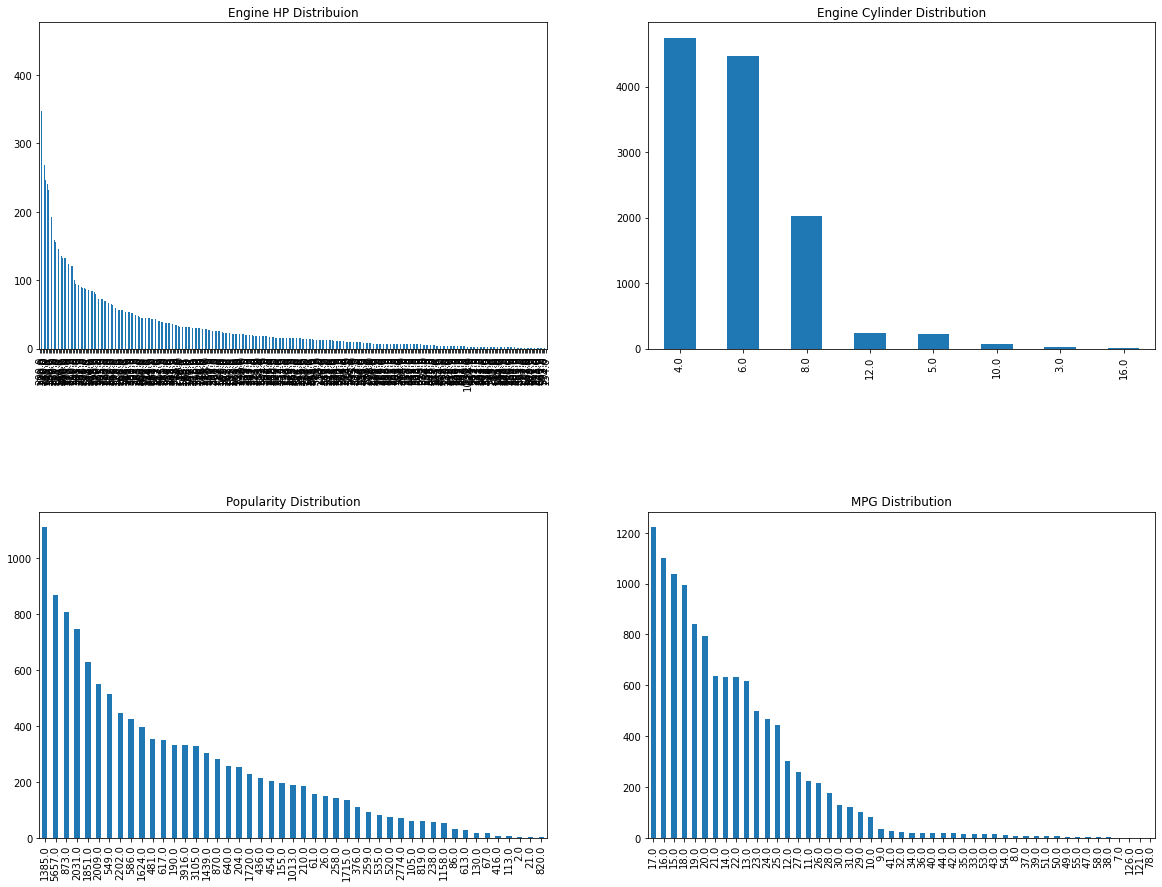

In [167]:
#Visualizing distribution of categorical variables
f,ax=plt.subplots(2,2,figsize=(20,15))
df['Engine HP'].value_counts().plot.bar(ax=ax[0,0])
ax[0,0].set_title('Engine HP Distribuion')
df['Engine Cylinders'].value_counts().plot.bar(ax=ax[0,1])
ax[0,1].set_title('Engine Cylinder Distribution')
df['Popularity'].value_counts().plot.bar(ax=ax[1,0])
ax[1,0].set_title('Popularity Distribution')
df['city mpg'].value_counts().plot.bar(ax=ax[1,1])
ax[1,1].set_title('MPG Distribution')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

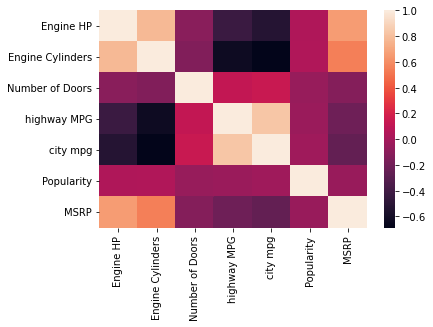

In [168]:
df.corr()
sns.heatmap(df.corr())

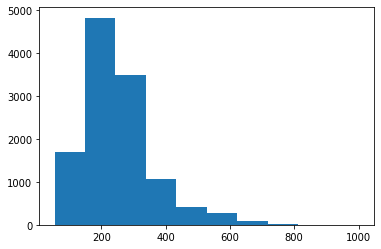

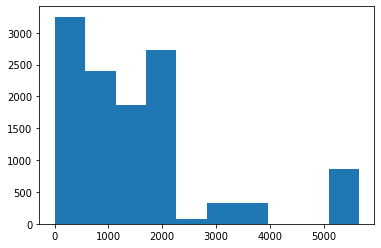

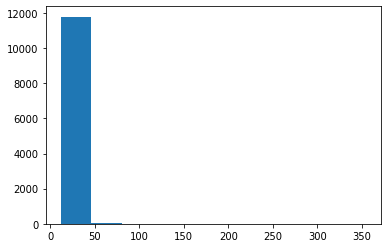

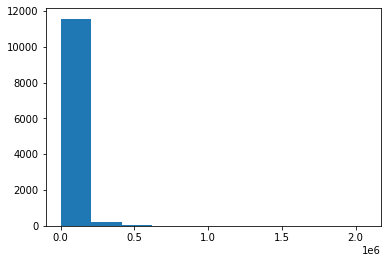

In [170]:
plt.hist(df['Engine HP'])
plt.show()
plt.hist(df['Popularity'])
plt.show()
plt.hist(df['highway MPG'])
plt.show()
plt.hist(df['MSRP'])
plt.show()